In [8]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

1. Utilice diferencia hacia adelante con dx =0.1 para calcular la derivada de la siguiente
funci´on. Compare su resultado con las derivadas anal´ıticas que puede calcular utilizando
Sympy. (1ptos)
f(x) = tanh(2x) con x ∈ [−2, 2]

In [36]:
# Numérico
def derivative(f, a, method='adelante', h=1e-1):
    if method == 'centrada':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'adelante':
        return (f(a + h) - f(a))/h
    elif method == 'atras':
        return (f(a) - f(a - h))/h
    else:
        raise ValueError("Los métodos pueden ser 'centrada', 'adelante' o 'atras'.")

def tanhip(x):
    return np.tanh(2*x)

derivada_numerica = derivative(tanhip, 0)
print(f'Derivada numérica en x=0: {derivada_numerica}')

# Sympy
from sympy import diff, symbols
t = symbols('t')
tanhip_sp = sp.tanh(2*t)

derivada_analitica_sp = sp.diff(tanhip_sp, t)
derivada_analitica_np = sp.lambdify(t, derivada_analitica_sp, 'numpy')
print(f'Derivada analítica sympy: {derivada_analitica_sp}')
print(f'Derivada numérica en x=0, sympy: {derivada_analitica_np(0)}')

Derivada numérica en x=0: 1.97375320224904
Derivada analítica sympy: 2 - 2*tanh(2*t)**2
Derivada numérica en x=0, sympy: 2.0


2. Con python muestre que si A es triangular su inversa es triangular y tiene determinante
det(A−1
) = 1/ det A. (0.5ptos)

In [48]:
from numpy import linalg as lin

A = np.array([[3, 2, 5], [0, 1, 1], [0, 0, 3]])
print(f'Matriz A: \n{A}\n')

inversa = lin.inv(A)
print(f'Matriz inversa de A: \n{inversa}\n')

igualdad_propiedad_det = lin.det(inversa) == (1 / lin.det(A))
print(f'¿Se cumple la propiedad det(A^-1) = 1/det(A)?: {igualdad_propiedad_det}')

Matriz A: 
[[3 2 5]
 [0 1 1]
 [0 0 3]]

Matriz inversa de A: 
[[ 0.33333333 -0.66666667 -0.33333333]
 [ 0.          1.         -0.33333333]
 [ 0.          0.          0.33333333]]

¿Se cumple la propiedad det(A^-1) = 1/det(A)?: True


3. Las integrales de Fresnel se definen mediante las siguientes expansiones que adem´as se
pueden expresar en series de potencias que convergen para todo z: (2ptos)
S(z) = Z z
0
sen(t
2
) dt =
X∞
n=0
(−1)n
z
4n+3
(4n + 3)(2n + 1)!
C(z) = Z z
0
cos
t
2

dt =
X∞
n=0
(−1)n
z
4n+1
(4n + 1)(2n)!
a) Compruebe la aproximacion, es decir para cualquier z se cumple la igualda sin librerias.(1ptos)
b) Grafique S(z) y C(z) para 0 ≤ z ≤ 10.(0.5ptos)
c) Grafique en el plano (−1 ≤ x, y ≤ 1), es dcir, tome x = C(z) y y = S(z).(0.5ptos)

In [77]:
from math import factorial

# Cálculos literal a)
def Von_Neumann(f,m,M,a,b,N):
    Nmax = 0
    Nmenos = 0
    for i in range(N):
       x = np.random.uniform(a,b)
       y = np.random.uniform(-m,M)
       # punto dentro del área positiva de la integral
       if (y > 0)and(y < f(x)): Nmax   += 1
       # punto dentro del área negativa de la integra
       if (y < 0)and(y > f(x)): Nmenos += 1

    # la integral es el área positiva menos el área negativa
    #  y el área del rectángulo es 2W0(b-a).
    I = (Nmax - Nmenos)/N*(M+m)*(b-a)

    return I

def sen_cuadrado(x):
    return np.sin(x ** 2)

def cos_cuadrado(x):
    return np.cos(x ** 2)

def Simpson1_3(f,a,b,n=100):
   h = (b - a)/n
   S0 = f(a) + f(b)
   S1 = 0
   S2 = 0
   for i in range(1,n):  # suma en 1, ..., n-1
     if (i%2==0):
        S2 += f(a + i*h) # suma de pares
     else:
        S1 += f(a + i*h) # suma de impares
   return (S0 + 2*S2 + 4*S1)*h/3

def integral_fresnel(f, z):
    return Simpson1_3(f, 0, z)

# Integral por aproximación
def aprox_fresnel_seno(z, num_terminos=50):
    aproximacion = 0
    for n in range(0, num_terminos):
        aproximacion += (-1)**n * ((z**(4*n + 3)) / ((4*n + 3) * factorial(2*n + 1)))

    return aproximacion

def aprox_fresnel_cos(z, num_terminos=50):
    aproximacion = 0
    for n in range(0, num_terminos):
        aproximacion += (-1)**n * ((z**(4*n + 1)) / ((4*n + 1) * factorial(2*n)))

    return aproximacion

# Igualdad para seno
print(f'Integral para seno(x^2)')
for i in range(5):
    integral_numerica = integral_fresnel(sen_cuadrado, i)
    aproximacion = aprox_fresnel_seno(i)
    print(f'Integral numérica: {integral_numerica}')
    print(f'Aproximación: {aproximacion}')

# Igualdad para coseno
print(f'\nIntegral para cos(x^2)')
for i in range(5):
    integral_numerica = integral_fresnel(cos_cuadrado, i)
    aproximacion = aprox_fresnel_cos(i)
    print(f'Integral numérica: {integral_numerica}')
    print(f'Aproximación: {aproximacion}')

print(':D')

Integral para seno(x^2)
Integral numérica: 0.0
Aproximación: 0.0
Integral numérica: 0.3102683009222086
Aproximación: 0.3102683017233811
Integral numérica: 0.8047765427366712
Aproximación: 0.8047764893437561
Integral numérica: 0.7735633481503962
Aproximación: 0.773562526893764
Integral numérica: 0.7471411074136515
Aproximación: 0.7471338446408652

Integral para cos(x^2)
Integral numérica: 0.0
Aproximación: 0.0
Integral numérica: 0.9045242379139515
Aproximación: 0.904524237900272
Integral numérica: 0.46146143333432027
Aproximación: 0.46146146243321595
Integral numérica: 0.7028641093008199
Aproximación: 0.7028635577302536
Integral numérica: 0.5944588865543161
Aproximación: 0.5944603275024813
:D


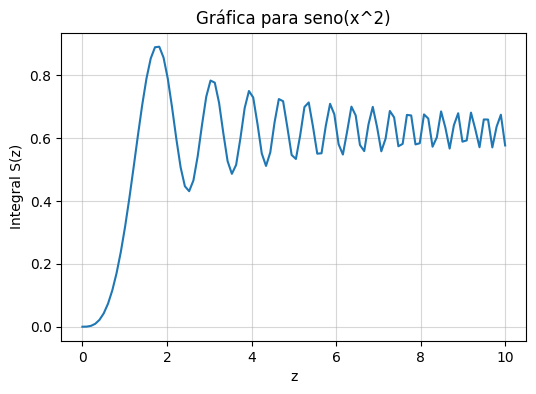

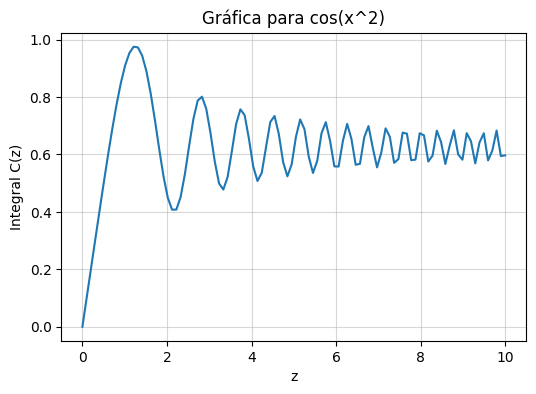

In [83]:
# Gráficas literal b)
z = np.linspace(0, 10, 100)
y_seno = integral_fresnel(sen_cuadrado, z)
y_cos = integral_fresnel(cos_cuadrado, z)

plt.figure(figsize=(6, 4))
plt.plot(z, y_seno)
plt.title('Gráfica para seno(x^2)')
plt.xlabel('z')
plt.ylabel('Integral S(z)')
plt.grid(True, alpha=0.5)
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(z, y_cos)
plt.title('Gráfica para cos(x^2)')
plt.xlabel('z')
plt.ylabel('Integral C(z)')
plt.grid(True, alpha=0.5)
plt.show()

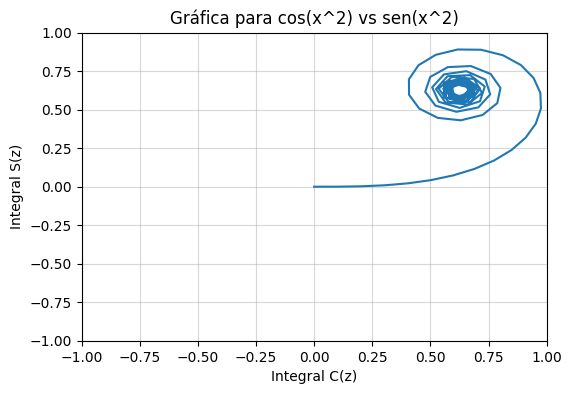

In [87]:
# Gráfica literal c)
plt.figure(figsize=(6, 4))
plt.plot(y_cos, y_seno)
plt.title('Gráfica para cos(x^2) vs sen(x^2)')
plt.xlabel('Integral C(z)')
plt.ylabel('Integral S(z)')
plt.grid(True, alpha=0.5)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()


4. Considere la ecuaci´on diferencial de segundo orden de un oscilador:
d
2
y
dt2
−
k
m
y = 0
Haciendo un cambio de variable, convierta la ecuaci´on diferencial de segundo orden en
una de primer orden. Luego, usando las condiciones iniciales x(0) = 0 y v(0) = 3 resuelva
el sistema con alg´un m´etodo num´erico. Compruebe su soluci´on con SciPy. (1.5ptos)

## Cambio de variables

Si tengo que $\frac{d^2y}{dt^2} - \frac{k}{m}y = 0$ Entonces puedo hacer un cambio de variable tal que $v =\frac{dy}{dy}$

De esta forma, $\frac{dv}{dt} = \frac{d^2y}{dt^2}$ y, por lo tanto, la ecuación final quedaría de esta forma: $$\frac{dv}{dt} - \frac{k}{m} \cdot \frac{v^2}{2} = 0$$

In [123]:
?solve_ivp

In [130]:
from scipy.integrate import solve_ivp
def euler(f,x0,xn,y0,n):

    h=(xn-x0)/n
    x0_l=[]
    yn_l=[]

    for i in range(n):
        slope=f(x0,y0)
        yn=y0+h*slope
        y0=yn
        x0=x0+h
        x0_l.append(x0)
        yn_l.append(yn)

    return yn_l

k = 1.0
m = 1.0
y0 = 0
v0 = 3

def solucion_euler(t, v):
    dvdt = (k / m) * (v**2 / 2)
    return dvdt

solucion_numerica = euler(solucion_euler, 0, 1, 3, 10)
print(solucion_numerica)


# # Sistema de ecuaciones solucion scipy
def oscilador(t, z):
    y, v = z
    dydt = v
    dvdt = (k / m) * y
    return dvdt

z0 = [y0, v0] #ics
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 10)

sol = solve_ivp(oscilador, t_span, z0, t_eval=t_eval, method='RK45')
sol

[3.45, 4.0451250000000005, 4.863276813281251, 6.045849881411203, 7.873464920839196, 10.973037413823466, 16.993414918081946, 31.43222244698645, 80.83145284482839, 407.5176412951142]


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.111e+00  2.222e+00  3.333e+00  4.444e+00
             5.556e+00  6.667e+00  7.778e+00  8.889e+00  1.000e+01]
        y: [[ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
            [ 3.000e+00  3.000e+00 ...  3.000e+00  3.000e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 50
     njev: 0
      nlu: 0